# TODOs
- [X] Metadaten.json zu Python Variablen, in Python Dictionary einspeisen und auslesen (Parkpl√§tze, WiFi) -> Frank
- [X] Map (Slider, Heat Map, Animationen) Visualisierungen -> Frank
- [X] virtual env vorbereiten -> Rich
- [X] projektserver? -> Rich
- [X] Erste Statistiken (Bar Charts, Graphs usw.) Visualisierungen -> Rich
- [ ] Chart Ideen -> Anja
- [ ] Unsere Daten in PowerBI einspeisen, (welche Daten br√§uchten wir z.B. f√ºr Graph Bubble oder allgemeine Sachen) oder was kostenloses (z.B. CliqSense) -> Anja

# Unsere Quellen zum Visualisierungserfolg:
### Wie W√§hle ich die richtige Visualisierung?

https://eazybi.com/blog/data_visualization_and_chart_types/

### Wo finde ich sie in Python?

https://python-graph-gallery.com

# Dom√§nenwissen

* √ñffnungszeiten (Theater, Uni)
* Peak Times, Tag
* Ferienzeiten
* Special Events (Demos, Strassensperren)
* Parkpl√§tze kostenlos/bezahlt?
* Sonntag Flohmarkt

# Ideen
* Vergleich mit Wetterdaten
* Verlgeich mit √ñffis -> Empfehlungen aussprechen -> z.B. mehr Busse sollen fahren, aber eine U-Bahn kann ausfallen
* Anhand von haupts√§chlich Fu√üg√§nger k√∂nnte man behaupten, wann Vorlesungen auf der TU sind

# Korrelation
* Wie viele fahren rein um bestimmte Uhrzeit rein -> Belegung Parkpl√§tze
* WiFi Nutzung in Zusammenhang mit parkenden Autos?

# Pr√§diktionen (ML)
* Traffic-/Personenaufkommen zu bestimmten Tageszeiten

# Distribution
* Normalverteilung

# Intervall
* Tageszeiten
* Wochen

# Fragen flow.lab
* Wie wurden Pedestrian Daten aufgenommen?
* Was sind die Daten bei WiFi?
* Gibt es schon Ergebnisse aus Wettbewerb?
* Gibt es neue Daten?
* Erkl√§rung zu Datenset?

## Data f√ºr PowerBI

1. Parking:
i. menschlich lesbaren namen geben
ii. TIme in excel format speichern 
    a. wochen (sp√§ter statistik woche zu woche)
    b. wochentage ( stat wochentag zu denselben ander woche)
    c. tageszeit ( stat pro tag)
    d. Alle Stat √ºber ganze periode, woche, tag
    e. Balkendia mit max-belegung durch tag, woche, ganze periode
    f. haufigkeit der belegung

2. Trafic:
i. Time in excel format speichern
ii. kl√§ren was ist overall

3. wifi:
i. no legend - no ststistics

4. pedestrian:
i. Time!
ii. wir k√∂nnen allgemein menschenZahl in bezug zu Zeit analysieren. 
Bsp. 12:00 = 234 am Platz

zu alle : 1 Korellation mit Zeit pr√ºfen
          2 alle Intervalle auf einander legen  - Min Max Median Mittelwert
	  3 Hypotesen: 
		Studis parken
		Flohmarkt parkt
		Stosszeiten ermitteln und gegenbeispiel untersuchen. siehe 2
		Normalverteilt? siehe 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins as plugins
from IPython.display import HTML
import sklearn as sk
import numpy as np
import json

In [3]:
# Hide Code Function

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Erkl√§rungen/Links zu wichtigen Libraries
- Markdown schreiben hier in Jupyter: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
- folium f√ºr map Visualisierungen: https://github.com/python-visualization/folium

### Daten einlesen
> Erns-Reuter-Platz Datensatz aus http://flow.dai-labor.de

In [2]:
wifi = pd.read_csv('data/wifi.csv')
parking = pd.read_csv('data/parking.csv', delimiter=' ')
# TODO: hier restlichen Datens√§tze einlesen

### Sinn aus den Daten machen 

In [3]:
# TODO: alle Typen aus der metadata.json in Python Variablen, z.B.:
campus_eb = [52.512388, 13.32360925]
campus_tel = [52.51298775, 13.32029525]
ernst_reuter_platz_center = [52.512611, 13.321856]

# TODO: json daten auslesen
metadata = json.loads(open('data/metadata.json').read())

wifi_latlon = metadata['wifi']['latlon']
pedestrian_latlon = metadata['pedestrian']['latlon']
traffic_latlon = metadata['traffic']['latlon']
parking_latlon = metadata['parking']['latlon']

### Wichtige Libraries
- folium f√ºr map Visualisierungen: https://github.com/python-visualization/folium

### Alle WiFi Standorte auf Karte visualisieren

In [4]:
## TODO: take center of ernst-reuter platz as location=POINT
map = folium.Map(location=ernst_reuter_platz_center, zoom_start=17)


for key in wifi_latlon:
    folium.Circle(
        radius=50,
        location=wifi_latlon[key],
        popup=key,
        color='#3186cc',
        fill=True
    ).add_to(map)
    
for key in pedestrian_latlon:
    folium.Marker(
        location=pedestrian_latlon[key],
        popup=key,
        icon=folium.Icon(icon='info-sign')
    ).add_to(map)
    
for key in traffic_latlon:
    folium.Marker(
        location=traffic_latlon[key],
        popup=key,
        icon=folium.Icon(color='red',icon='info-sign')
    ).add_to(map)

for key in parking_latlon:
    folium.Circle(
        radius=2,
        location=parking_latlon[key],
        popup=key,
        color='red',
        fill=True
    ).add_to(map)

map

### Zum Vergleich Originalstandorte:
(TODO: Karte rotieren?)

![Sensor_Locations](images/Sensor_Locations.jpg)

### Parking Data

In [5]:
mean_parking = {}

startTime = float(parking[['Timestamp']].iloc[0])
endTime = float(parking[['Timestamp']].iloc[-1])
timeSpan = endTime - startTime

for key in parking_latlon:
    temp = parking[parking['ParkingSpotID'] == key][['Timestamp','Occupied']]
    occupied = temp.iloc[0]['Occupied'] == 1
    lastTime = startTime
    mean_parking[key] = 0
    for index, row in temp.iterrows():
        if occupied != (row['Occupied'] == 1):
            if occupied:
                mean_parking[key] += row['Timestamp'] - lastTime
            else:
                lastTime = row['Timestamp']
            occupied = row['Occupied'] == 1
    if occupied:
                mean_parking[key] += endTime - lastTime
    mean_parking[key] /= timeSpan
    print(key, ":", mean_parking[key])
            
##for key in parking_latlon:  
##    mean_parking[key] = parking[parking['ParkingSpotID'] == key][['Occupied']].mean()    
## This is the wrong aproach! data points are only created when the Occupied property changes, so the Mean has to be around 50%
## the correct way is to calculate the mean-time the Parking Spot was occupied

##print(mean_parking)


Parking_26 : 0.4745755398860814
Parking_25 : 0.5073588844292795
Parking_21 : 0.44496773662609473
Parking_24 : 0.40650217531453403
Parking_23 : 0.3927269087100178
Parking_22 : 0.5066861406338022
Parking_17 : 0.3959405832415216
Parking_20 : 0.30792665329694974
Parking_19 : 0.4171694467749902
Parking_18 : 0.35652623531929434
Parking_07 : 0.2668880001103557
Parking_16 : 0.3705665578094636
Parking_09 : 0.41937895407675896
Parking_08 : 0.37209460567403124
Parking_06 : 0.5293633821403173
Parking_05 : 0.43051202648294506
Parking_04 : 0.3735082130365179
Parking_03 : 0.43668823875065543
Parking_02 : 0.41271667139640544
Parking_01 : 0.4293735834663292
Parking_15 : 0.42231784320333643
Parking_14 : 0.3675538274083463
Parking_13 : 0.3898855950240536
Parking_10 : 0.42648753218087343
Parking_11 : 0.40744900625309044
Parking_29 : 0.42695055456318
Parking_12 : 0.4896804620973083
Parking_27 : 0.38987436927751323
Parking_28 : 0.4040955146391696
Parking_30 : 0.39462531627510156
Parking_31 : 0.2706587178303

In [6]:
parkplatz_center = [52.513025, 13.319505]
parking_map = folium.Map(location=parkplatz_center, zoom_start=18)

for key in parking_latlon:
    visual = (mean_parking[key] - 0.25) * 2
    folium.Circle(
        radius=1,
        location=parking_latlon[key],
        popup=key,
        color='#%02x%02x%02x' % (int(255 * (1-visual)),int(255 * (1-visual)), int(255 * (1-visual))),
        fill=True
    ).add_to(parking_map)
    
## schwarz = h√§ufig belegt, wei√ü = weniger h√§ufig belegt
# TODO: Prozente 
parking_map

## Basic Statistics

### Pedestrians

In [7]:
df_pedestrians_original = pd.read_csv('data/pedestrian_counts_tel_a.csv', sep=" ")
print('Total number of entries: \n\n' + str(df_pedestrians_original.count()))
print('\n\nExample Output: ')
df_pedestrians_original.head()

Total number of entries: 

StationIdentifier    402616
Timestamp            402616
Direction            402616
Count                402616
dtype: int64


Example Output: 


StationIdentifier      Timestamp Direction  Count
0    CounterVorplatzGeb-AF2-PeopleCounter  1515525300416        IN      0
1    CounterVorplatzGeb-AF2-PeopleCounter  1515525300418       OUT      0
2  CounterHaupteingang-TEL4-PeopleCounter  1515525300417        IN      0
3  CounterHaupteingang-TEL4-PeopleCounter  1515525300415       OUT      0
4    CounterVorplatzGeb-AF2-PeopleCounter  1515525360372        IN      0

### Clean

In [31]:
# clone for backup
df_pedestrians = df_pedestrians_original
# rename
df_pedestrians = df_pedestrians.replace({'CounterVorplatzGeb-AF2-PeopleCounter':'af_counter', 'CounterHaupteingang-TEL4-PeopleCounter':'telekom_counter'})
# drop zero counts
df_pedestrians = df_pedestrians[df_pedestrians.Count != 0]
# timestamp to python data type
df_pedestrians['Timestamp'] = pd.to_datetime(df_pedestrians['Timestamp'].astype(int), unit='ms')
df_pedestrians.head(1000)

StationIdentifier               Timestamp Direction  Count
6      telekom_counter 2018-01-09 19:16:00.357        IN      1
10     telekom_counter 2018-01-09 19:16:00.357        IN      1
22     telekom_counter 2018-01-09 19:18:00.318        IN      1
23     telekom_counter 2018-01-09 19:18:00.317       OUT      1
26     telekom_counter 2018-01-09 19:18:00.318        IN      1
27     telekom_counter 2018-01-09 19:18:00.317       OUT      1
30     telekom_counter 2018-01-09 19:19:00.412        IN      1
34     telekom_counter 2018-01-09 19:19:00.412        IN      1
38     telekom_counter 2018-01-09 19:20:00.350        IN      1
42     telekom_counter 2018-01-09 19:20:00.350        IN      1
70     telekom_counter 2018-01-09 19:24:00.386        IN      2
74     telekom_counter 2018-01-09 19:24:00.386        IN      2
78     telekom_counter 2018-01-09 19:24:00.386        IN      2
98     telekom_counter 2018-01-09 19:27:00.338        IN      1
102    telekom_counter 2018-01-09 19:27:00.338        IN      1
110    telekom_counter 2018-01-09 19:29:00.349        IN      1
114    telekom_counter 2018-01-09 19:29:00.349        IN      1
122    telekom_counter 2018-01-09 19:31:01.248        IN      1
126    telekom_counter 2018-01-09 19:31:01.248        IN      1
129         af_counter 2018-01-09 19:32:00.344       OUT      1
133         af_counter 2018-01-09 19:32:00.344       OUT      1
139    telekom_counter 2018-01-09 19:33:00.369       OUT      1
143    telekom_counter 2018-01-09 19:33:00.369       OUT      1
278    telekom_counter 2018-01-09 19:50:00.324        IN      3
282    telekom_counter 2018-01-09 19:50:00.324        IN      3
286    telekom_counter 2018-01-09 19:51:00.316        IN      1
287    telekom_counter 2018-01-09 19:51:00.321       OUT      1
290    telekom_counter 2018-01-09 19:51:00.316        IN      1
291    telekom_counter 2018-01-09 19:51:00.321       OUT      1
301         af_counter 2018-01-09 19:54:01.343       OUT      1
...                ...                     ...       ...    ...
7609        af_counter 2018-01-10 11:31:00.389       OUT      1
7610   telekom_counter 2018-01-10 11:31:00.391        IN      2
7612        af_counter 2018-01-10 11:32:00.556        IN      1
7615   telekom_counter 2018-01-10 11:32:00.573       OUT      1
7616        af_counter 2018-01-10 11:32:00.556        IN      1
7619   telekom_counter 2018-01-10 11:32:00.573       OUT      1
7622   telekom_counter 2018-01-10 11:33:00.401        IN      1
7623   telekom_counter 2018-01-10 11:33:00.419       OUT      5
7626   telekom_counter 2018-01-10 11:33:00.401        IN      1
7627   telekom_counter 2018-01-10 11:33:00.419       OUT      5
7628        af_counter 2018-01-10 11:34:00.495        IN      1
7629        af_counter 2018-01-10 11:34:00.488       OUT      1
7631   telekom_counter 2018-01-10 11:34:00.483       OUT      1
7632        af_counter 2018-01-10 11:34:00.495        IN      1
7633        af_counter 2018-01-10 11:34:00.488       OUT      1
7635   telekom_counter 2018-01-10 11:34:00.483       OUT      1
7636        af_counter 2018-01-10 11:35:03.348        IN      1
7638   telekom_counter 2018-01-10 11:35:03.344        IN      1
7639   telekom_counter 2018-01-10 11:35:03.341       OUT      1
7640        af_counter 2018-01-10 11:35:03.348        IN      1
7642   telekom_counter 2018-01-10 11:35:03.344        IN      1
7643   telekom_counter 2018-01-10 11:35:03.341       OUT      1
7644        af_counter 2018-01-10 11:36:00.533        IN      1
7647   telekom_counter 2018-01-10 11:36:00.508       OUT      1
7648        af_counter 2018-01-10 11:36:00.533        IN      1
7651   telekom_counter 2018-01-10 11:36:00.508       OUT      1
7654   telekom_counter 2018-01-10 11:37:00.625        IN      2
7655   telekom_counter 2018-01-10 11:37:00.626       OUT      3
7658   telekom_counter 2018-01-10 11:37:00.625        IN      2
7659   telekom_counter 2018-01-10 11:37:00.626       OUT      3

[1000 rows x 4 columns]

### Verify Dataset Integrity

In [9]:
df_pedestrians_IN = df_pedestrians[df_pedestrians['Direction'] == 'IN'] 
df_pedestrians_OUT = df_pedestrians[df_pedestrians['Direction'] == 'OUT']

In [15]:
df_pedestrians_IN_af = df_pedestrians_IN[df_pedestrians_IN['StationIdentifier'] == 'af_counter']
df_pedestrians_OUT_af = df_pedestrians_OUT[df_pedestrians_OUT['StationIdentifier'] == 'af_counter']
df_pedestrians_IN_tel = df_pedestrians_IN[df_pedestrians_IN['StationIdentifier'] == 'telekom_counter']
df_pedestrians_OUT_tel = df_pedestrians_OUT[df_pedestrians_OUT['StationIdentifier'] == 'telekom_counter']

count_total_IN_records = df_pedestrians_IN['Count'].count()
count_total_OUT_records = df_pedestrians_OUT['Count'].count()
count_walked_IN_af = df_pedestrians_IN_af.Count.sum()
count_walked_OUT_af = df_pedestrians_OUT_af.Count.sum()
count_walked_IN_tel = df_pedestrians_IN_tel.Count.sum()
count_walked_OUT_tel = df_pedestrians_OUT_tel.Count.sum()

### Visualize

26957


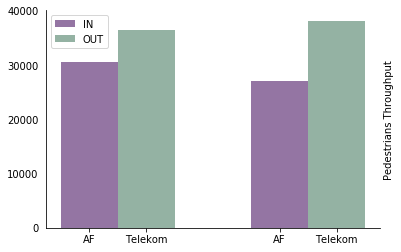

The buildings must be spawning pedestrians from the cellar üò±üßô
Or there might be different Entries to the building.


In [11]:
# as bar chart
bar_width = 0.3
print(count_walked_IN_tel)
bars1 = [count_walked_IN_af, count_walked_IN_tel]
bars2 = [count_walked_OUT_af, count_walked_OUT_tel]
# x position of bars
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
# create bars1
plt.bar(r1, bars1, width=bar_width, color=(0.3,0.1,0.4,0.6), capsize=7, label='IN')
plt.bar(r2, bars2, width=bar_width, color=(0.3,0.5,0.4,0.6), capsize=7, label='OUT')

# general layout
plt.xticks([0, 0.3, 1, 1.3], ['AF', 'Telekom', 'AF', 'Telekom'])
plt.ylabel('Pedestrians Throughput')
plt.gca().yaxis.set_label_position("right")
plt.locator_params(axis='y', nbins=5)
plt.legend()
plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
# Hide the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show graphic
plt.show()
print('The buildings must be spawning pedestrians from the cellar üò±üßô')
print('Or there might be different Entries to the building.')